# **Tutorial 10**


### Imports

In [4]:
import numpy as np # arrays, array operations
import scipy.stats as stats # statistics
from google.colab import files
import matplotlib.pyplot as plt # plot graphs
import pandas as pd #dataframes
import io
import xarray as xr #multidimensional dataframes
import pymc as pm
import arviz as az

!pip install bambi
import bambi as bmb


### Bambi Introduction

In [5]:
#make up some data

SIZE = 117
data = pd.DataFrame(
    {
        "y": np.random.normal(size=SIZE),
        "x": np.random.normal(size=SIZE),
        "z": np.random.normal(size=SIZE),
        "g": ["Group A", "Group B", "Group C"] * 39,
    }
)
data.head()

,y,x,z,g
0,1.415603,-0.965330,0.123103,Group A
1,1.617481,-0.367631,0.250099,Group B
2,0.625333,1.234438,-1.009349,Group C
3,0.399961,0.804369,-0.363171,Group A
4,-2.040137,0.389830,0.563774,Group B


First bambi model

In [6]:
a_model = bmb.Model("y ~ x", data)
a_model

       Formula: y ~ x
        Family: gaussian
          Link: mu = identity
  Observations: 117
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: -0.055, sigma: 2.618)
            x ~ Normal(mu: 0.0, sigma: 2.3841)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 1.0456)

With no intercept

In [8]:
no_intercept_model = bmb.Model("y ~ 0 + x", data)
no_intercept_model

       Formula: y ~ 0 + x
        Family: gaussian
          Link: mu = identity
  Observations: 117
        Priors: 
    target = mu
        Common-level effects
            x ~ Normal(mu: 0.0, sigma: 2.3841)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 1.0456)

### Bambi Bike Example

In [10]:
#get data
bikes = pd.read_csv("https://github.com/aloctavodia/BAP3/raw/refs/heads/main/code/data/bikes.csv")
bikes

,rented,hour,temperature,humidity,windspeed,weekday
0,16,0,3.28,0.81,0.0000,6
1,3,5,-0.48,0.47,0.2836,1
2,115,9,2.34,0.37,0.3284,3
3,73,13,1.40,0.37,0.2836,5
4,82,15,2.34,0.35,0.3582,0
...,...,...,...,...,...,...
343,90,9,4.22,0.48,0.3881,6
344,135,12,5.16,0.56,0.0896,1
345,13,15,4.22,0.87,0.3582,3
346,271,17,3.28,0.60,0.1343,5


Writing the model

In [17]:
model_t = bmb.Model("rented ~ temperature", bikes, family="negativebinomial")
idata_t = model_t.fit(1000, chains = 4)
model_t

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Posterior

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

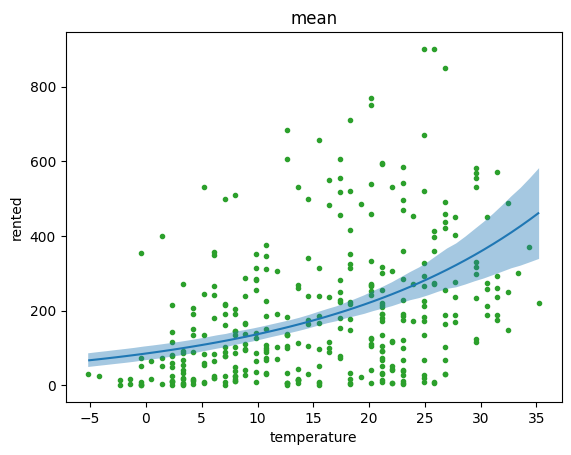

In [20]:
#mean
bmb.interpret.plot_predictions(model_t, idata_t, "temperature")
plt.plot(bikes.temperature, bikes.rented, "C2.", zorder=-3)
plt.title("mean")

plt.savefig("mean_post.png", bbox_inches='tight')
files.download("mean_post.png")

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

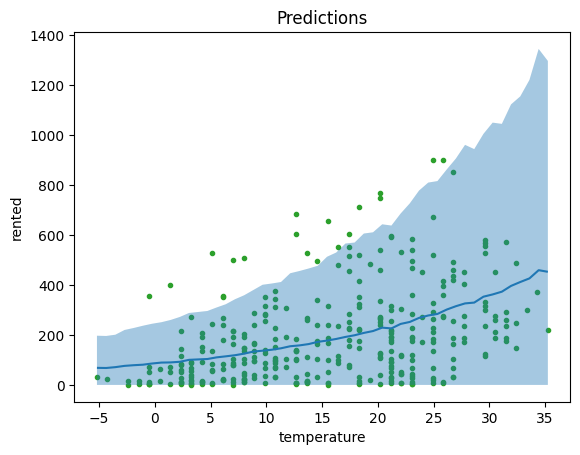

In [21]:
#posterior predictive
bmb.interpret.plot_predictions(model_t, idata_t, "temperature", pps=True)
plt.plot(bikes.temperature, bikes.rented, "C2.", zorder=-3)
plt.title("Predictions")

plt.savefig("pred_post.png", bbox_inches='tight')
files.download("pred_post.png")

Multiple regression

In [25]:
model_th = bmb.Model("rented ~ temperature + humidity", bikes, family="negativebinomial")
idata_th = model_th.fit(1000, chains = 4)
model_th

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

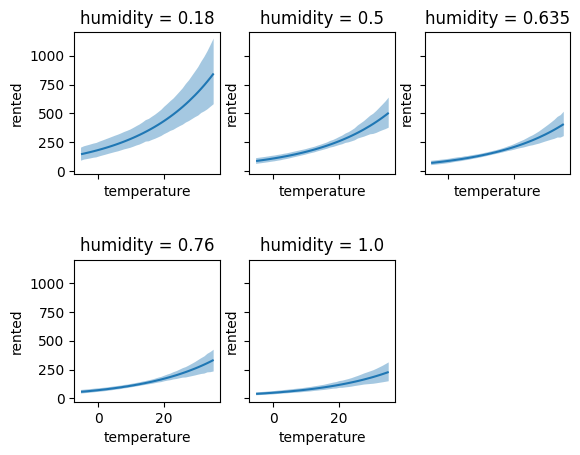

In [28]:
#posterior
bmb.interpret.plot_predictions(model_th, idata_th,
                               conditional={"temperature": bikes["temperature"],
                                            "humidity": [0.18, 0.5, 0.635, 0.76, 1.0]},
                               subplot_kwargs={"group":None, "panel":"humidity"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True});

plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots
plt.savefig("multi_post.png", bbox_inches='tight')
files.download("multi_post.png")


### Polynomial Regression

In [40]:
model_poly_1 = bmb.Model("rented ~ hour", bikes, family="negativebinomial")
idata_poly_1 = model_poly_1.fit(1000, chains = 4)
model_poly_4 = bmb.Model("rented ~ poly(hour, degree=4)", bikes, family="negativebinomial")
idata_poly_4 = model_poly_4.fit(1000, chains = 4)

model_poly_4b = bmb.Model("rented ~ hour + I(hour**2) + I(hour**3) + I(hour**4)", bikes, family="negativebinomial")
idata_poly_4b = model_poly_4b.fit(1000, chains = 4, init="adapt_diag", target_accept=0.9)

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

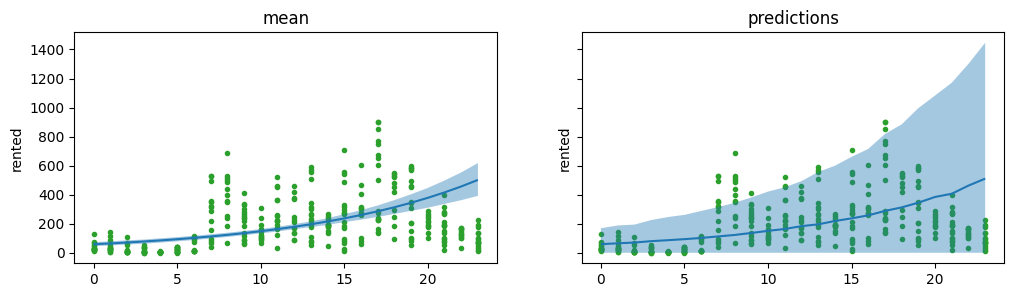

In [47]:
#first degree
_, axes = plt.subplots(1, 2, sharey=True, sharex="col", figsize=(12, 3))
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "hour", ax=axes[0])
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "hour", pps=True, ax=axes[1])

for ax in axes.ravel():
    ax.plot(bikes.hour, bikes.rented, "C2.", zorder=-3)
axes[0].set_title("mean")
axes[1].set_title("predictions")
axes[0].set_xlabel("")
axes[1].set_xlabel("")

plt.savefig("p1.png", bbox_inches='tight')
files.download("p1.png")

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

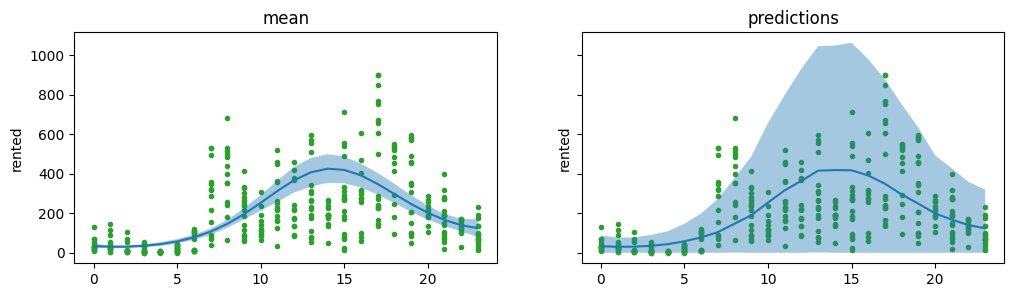

In [48]:
#fourth degree orthogonal
_, axes = plt.subplots(1, 2, sharey=True, sharex="col", figsize=(12, 3))
bmb.interpret.plot_predictions(model_poly_4, idata_poly_4, "hour", ax=axes[0])
bmb.interpret.plot_predictions(model_poly_4, idata_poly_4, "hour", pps=True, ax=axes[1])

for ax in axes.ravel():
    ax.plot(bikes.hour, bikes.rented, "C2.", zorder=-3)
axes[0].set_title("mean")
axes[1].set_title("predictions")
axes[0].set_xlabel("")
axes[1].set_xlabel("")

plt.savefig("p4.png", bbox_inches='tight')
files.download("p4.png")

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

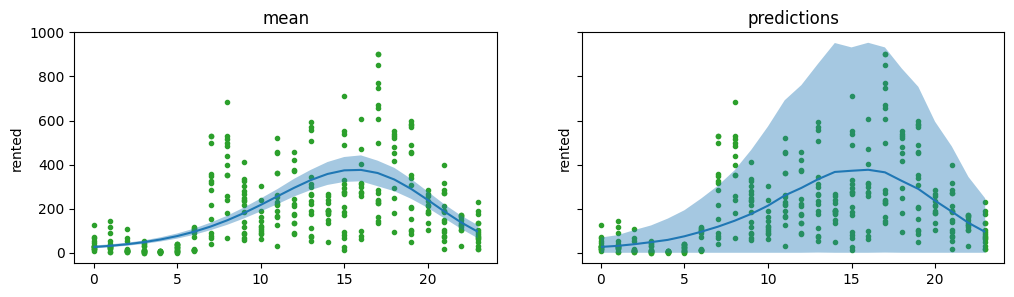

In [49]:
#fourth degree standard
_, axes = plt.subplots(1, 2, sharey=True, sharex="col", figsize=(12, 3))
bmb.interpret.plot_predictions(model_poly_4b, idata_poly_4b, "hour", ax=axes[0])
bmb.interpret.plot_predictions(model_poly_4b, idata_poly_4b, "hour", pps=True, ax=axes[1])

for ax in axes.ravel():
    ax.plot(bikes.hour, bikes.rented, "C2.", zorder=-3)
axes[0].set_title("mean")
axes[1].set_title("predictions")
axes[0].set_xlabel("")
axes[1].set_xlabel("")

plt.savefig("p4b.png", bbox_inches='tight')
files.download("p4b.png")

### Spline

In [51]:
num_knots = 6
knots = np.linspace(0, 23, num_knots+2)[1:-1]
model_spline = bmb.Model("rented ~ bs(hour, degree=3, knots=knots)", bikes, family="negativebinomial")
idata_spline = model_spline.fit(1000, chains = 4)

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

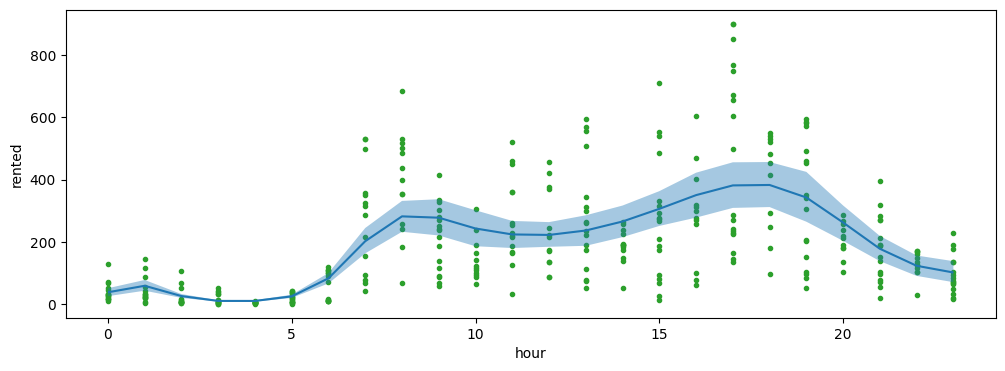

In [53]:
#plotting result
_, ax = plt.subplots(sharey=True, sharex="col", figsize=(12, 4))
bmb.interpret.plot_predictions(model_spline, idata_spline, "hour", ax=ax)
ax.plot(bikes.hour, bikes.rented, "C2.", zorder=-3)

plt.savefig("spline.png", bbox_inches='tight')
files.download("spline.png")